<a href="https://colab.research.google.com/github/ashrith1932/ML-works/blob/main/House%20price%20estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
df = pd.read_csv("/content/House Price Prediction Dataset.csv")
df = pd.get_dummies(df, columns=['Location'])
df = pd.get_dummies(df, columns=['Condition'])
df['Garage'] = df['Garage'].replace({'Yes': 1, 'No': 0})
x_train, x_test, y_train, y_test = train_test_split(df.drop('Price', axis=1), df['Price'], test_size=0.2)

/tmp/ipython-input-899450384.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Garage'] = df['Garage'].replace({'Yes': 1, 'No': 0})


R2 Score: 0.005028242445247799
MAE: 245710.5307369277
MSE: 78900467554.238


/tmp/ipython-input-3533950928.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


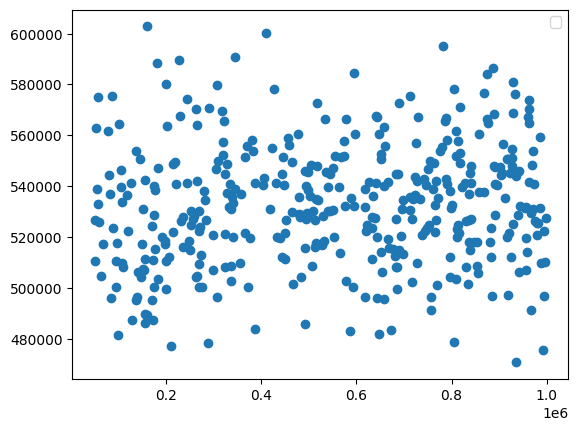

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
# print(prediction)

print("R2 Score:", r2_score(y_test, prediction))
print("MAE:", mean_absolute_error(y_test, prediction))
print("MSE:", mean_squared_error(y_test, prediction))
plt.scatter(y_test, prediction)
plt.legend()
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rfn = RandomForestRegressor(
    n_estimators = 400,
    random_state=42
)
rfn.fit(x_train, y_train)
rfnpred = rfn.predict(x_test)

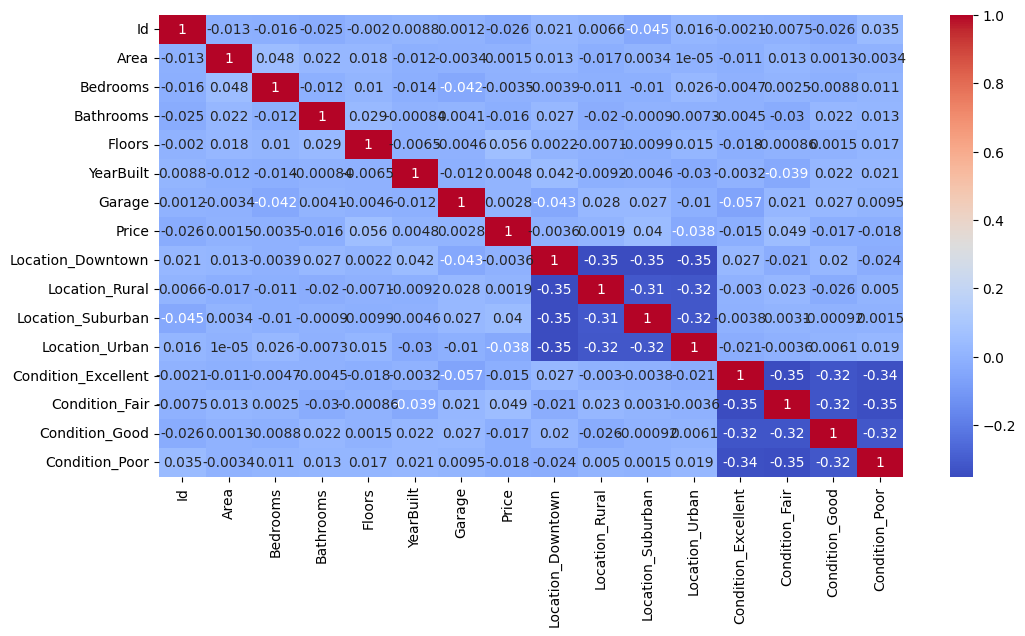

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [17]:
print("R2 Score:", r2_score(y_test, rfnpred))

R2 Score: -0.06189799272283847
